# 🛒 Customer Sales Analysis Project

## 📌 Project Overview
This project is based on a **synthetic dataset of customer transactions**.  
The dataset contains information such as customer demographics (age, gender), purchase details (date, amount, product category), and customer feedback (ratings).  

Our main goal is to **analyze customer purchasing behavior** in order to extract meaningful business insights.

---
## 🎯 Objectives
1. **Data Cleaning & Preparation**  
   - Handle missing values, inconsistent data, and outliers.  
   - Standardize columns for accurate analysis.  

2. **Customer Behavior Analysis**  
   - Study sales trends over time (monthly/quarterly/annual).  
   - Understand demographics: age groups, gender distribution, and location effects.  
   - Evaluate customer ratings and satisfaction patterns.  

3. **Product Performance Analysis**  
   - Identify high-performing products (“winning products”) based on sales.
   - Analyze product ratings across categories.  
   - Highlight seasonal patterns (peak vs. low sales months).  

4. **Business Insights & Recommendations**  
   - Support product strategy (bundles, promotions, targeting).  

## Exploratory Data Analysis (EDA):

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

customer=pd.read_csv(r"C:/Users/mokta/OneDrive/Desktop/programming/data analysis/dataset/fake_customer_data_with_errors.csv")
customer

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,2023-08-04,Toys,5.0,NaN,male
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,2024-01-28,Toys,5.0,NaN,M
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,2024-09-29,Books,NaN,NaN,M
2148,CUST1694,John Ali,200.0,Female,john.ali@yahoo.com,987654321.0,250.47,2024-02-05,NaN,5.0,NaN,Female


In [48]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [49]:
for col in customer.columns:
    print(customer[col].unique()[:10])

['CUST1000' 'CUST1001' 'CUST1002' 'CUST1003' 'CUST1004' 'CUST1005'
 'CUST1006' 'CUST1007' 'CUST1008' 'CUST1009']
['Ali Hassan' 'Fatma Ali' 'Ahmed Mahmoud' 'Ahmed Gaber' 'Ali Ibrahim'
 'Alaa Ibrahim' 'Mark Ali' 'Alaa Hassan' 'John Hassan' 'Fatma Gaber']
[ 72.  nan  -1.  73. 200.  89.  18.  15.  44.  67.]
[nan 'Female' 'male' 'F' 'M' 'female' 'Male']
['ali.hassan@gmail.com' 'fatma.ali@hotmail.com'
 'ahmed.mahmoud@hotmail.com' 'ahmed.gaber@gmail.com'
 'ali.ibrahim@yahoo.com' 'alaa.ibrahim@hotmail.com' 'mark.ali@hotmail.com'
 'alaa.hassan@hotmail.com' 'john.hassan@yahoo.com'
 'fatma.gaber@hotmail.com']
[1.23456789e+08            nan 9.87654321e+08]
[837.31 900.25 761.72 303.72 635.81 886.26  92.53 318.43 883.52 966.47]
['2023-10-12' '2023-02-23' '2023-07-07' '2023-12-30' '2023-12-07'
 '2025-01-16' '2024-06-12' '2024-05-17' '32/13/2020' '2025-01-24']
['Books' nan 'Toys' 'Clothing' 'Home' 'Electronics']
[ 3.  2. 10.  4. nan  1.  5.]
[nan]
[nan 'Female' 'male' 'F' 'M' 'female' 'Male']


In [ ]:
customer.isna().sum()

CustomerID            0
Name                  0
Age                 520
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

In [ ]:
customer.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

we have duplicated column which is Gender and null column called 'Unnamed' , we should remove them.

## Data Cleaning :

In [ ]:
# removing Unnamed and Gender columns
customer=customer.drop(columns=['Unnamed','  Gender  '])
customer

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0
...,...,...,...,...,...,...,...,...,...,...
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,2023-08-04,Toys,5.0
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,2024-01-28,Toys,5.0
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,2024-09-29,Books,NaN
2148,CUST1694,John Ali,200.0,Female,john.ali@yahoo.com,987654321.0,250.47,2024-02-05,NaN,5.0


In [ ]:
negative_age = customer[customer['Age']<=0]
negative_age

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0
6,CUST1006,Mark Ali,-1.0,male,mark.ali@hotmail.com,NaN,92.53,2024-06-12,Books,2.0
10,CUST1010,Ahmed Smith,-1.0,M,ahmed.smith@gmail.com,987654321.0,882.19,2025-06-24,NaN,3.0
11,CUST1011,Sara Smith,-1.0,Male,sara.smith@yahoo.com,NaN,405.79,2024-08-05,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...
2130,CUST1051,Ali Smith,-1.0,M,ali.smith@yahoo.com,NaN,968.44,2024-07-01,Home,2.0
2132,CUST2287,Fatma Mahmoud,-1.0,female,fatma.mahmoud@gmail.com,NaN,704.74,32/13/2020,Toys,NaN
2133,CUST2124,Fatma Ibrahim,-1.0,NaN,fatma.ibrahim@gmail.com,987654321.0,NaN,2025-05-06,Toys,5.0
2140,CUST2259,Mark Smith,-1.0,M,mark.smith@yahoo.com,987654321.0,653.34,2023-02-12,Home,4.0


In [ ]:
very_old=customer[customer['Age']==200]['Age']
very_old

7       200.0
9       200.0
16      200.0
17      200.0
24      200.0
        ...  
2129    200.0
2137    200.0
2141    200.0
2144    200.0
2148    200.0
Name: Age, Length: 559, dtype: float64

We should convert negatives ages and ages equal 200 to nan values.

In [ ]:
# How we deal with negatives ages and customers with 200 years old
customer.loc[list(negative_age.index),'Age']=np.nan
customer.loc[list(very_old.index),'Age']=np.nan
customer['Age']=customer['Age'].fillna(customer['Age'].mean())

In [ ]:
# correcting Gender's values
customer['Gender']=customer['Gender'].fillna(customer['Gender'].mode()[0])
customer['Gender']=customer['Gender'].astype(str)
customer['Gender']=customer['Gender'].str.lower()
customer['Gender']=customer['Gender'].replace({'f':'female','m':'male'})

In [ ]:
# Filling missing values in Purchase amount column with Purchase amount mean
customer['PurchaseAmount'] = customer['PurchaseAmount'].fillna(customer['PurchaseAmount'].mean())

In [ ]:
# Filling missing values in Product category column with 'Unknown' and convert column type from object to category
customer['ProductCategory']=customer['ProductCategory'].fillna('Unknown')
customer['ProductCategory'] = customer['ProductCategory'].astype('category')

In [ ]:
# convert Purchase date column type from object to datetime
customer['PurchaseDate'] = pd.to_datetime(customer['PurchaseDate'], errors='coerce')

In [ ]:
# removing rating values equal to 10 and filling missing values with the most repeated value
customer['Rating']=customer['Rating'].replace(10,np.nan)
customer['Rating']=customer['Rating'].fillna(customer['Rating'].mode()[0])

In [ ]:
# checing if our changes done
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       2150 non-null   object        
 1   Name             2150 non-null   object        
 2   Age              2150 non-null   float64       
 3   Gender           2150 non-null   object        
 4   Email            2150 non-null   object        
 5   Phone            1072 non-null   float64       
 6   PurchaseAmount   2150 non-null   float64       
 7   PurchaseDate     2028 non-null   datetime64[ns]
 8   ProductCategory  2150 non-null   category      
 9   Rating           2150 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(4), object(4)
memory usage: 153.6+ KB


In [ ]:
# Removing duplicated rows
customer=customer.drop_duplicates()

In [ ]:
# Saving our new cleaned dataset
customer.to_csv("fake_customer_cleaned.csv",index=False)

## Data Analysis : 

### High Demand Products Categories :

In [ ]:
clients_nbr_by_category=pd.DataFrame(customer.groupby('ProductCategory',observed=False)['CustomerID'].count().sort_values(ascending=False))
clients_nbr_by_category

,CustomerID
ProductCategory,
Unknown,565
Clothing,323
Electronics,323
Books,305
Home,296
Toys,288


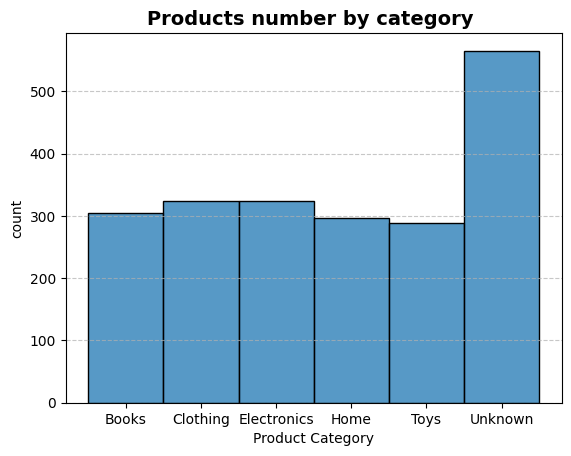

In [ ]:
sns.histplot(customer['ProductCategory'],bins=25)
plt.title("Products number by category ", fontsize=14, fontweight="bold")
plt.xlabel("Product Category")
plt.ylabel("count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- high demand products categories are : clothing and electronics .
- we should focus on these two categories where there is a big potential to find wining product in these cayegories.

### Top Selling Products:

In [ ]:
sales_by_category=pd.DataFrame(customer.groupby('ProductCategory',observed=False)['PurchaseAmount'].sum().round(2))
sales_by_category

,PurchaseAmount
ProductCategory,
Books,155686.84
Clothing,173034.52
Electronics,161823.37
Home,148155.84
Toys,151063.27
Unknown,280974.24


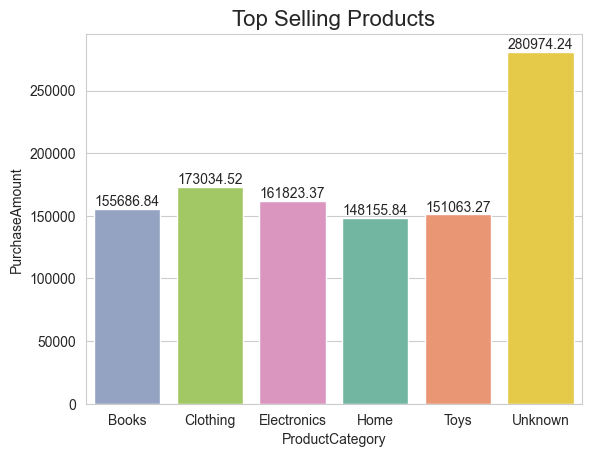

In [21]:
sns.set_style("whitegrid")
ax = sns.barplot(x='ProductCategory',y='PurchaseAmount',data=sales_by_category,hue='PurchaseAmount',palette='Set2',legend=False)
plt.title("Top Selling Products", fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.show()

- top selling products categories are : clothing and electronics .
- we should focus on this category where there is a big potential to find wining product in this cayegorie.

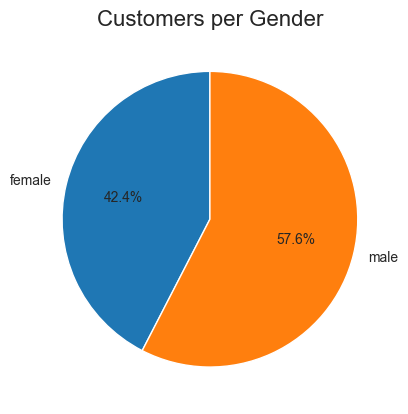

In [ ]:
# Count number of customers per gender (Series, not DataFrame)
clients_nbr_by_gender = customer.groupby('Gender', observed=False)['CustomerID'].count()

# Plot pie chart
plt.pie(clients_nbr_by_gender, 
        labels=clients_nbr_by_gender.index, 
        autopct='%1.1f%%', 
        startangle=90)
plt.title("Customers per Gender", fontsize=16)
plt.show()


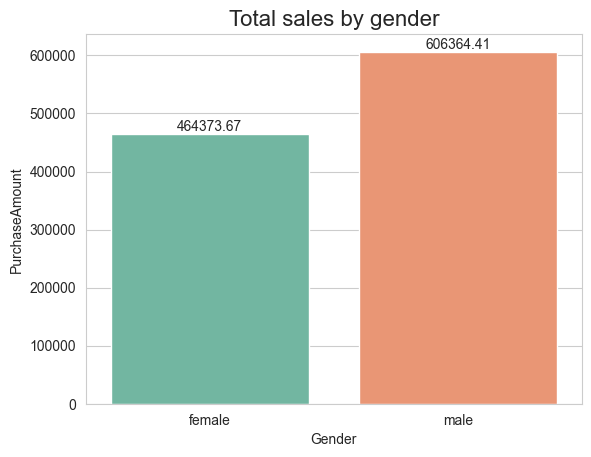

In [ ]:
sales_by_gender=pd.DataFrame(customer.groupby('Gender',observed=False)['PurchaseAmount'].sum().round(2))
ax1 = sns.barplot(x='Gender',y='PurchaseAmount',data=sales_by_gender,hue='Gender',palette='Set2',legend=False)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.title("Total sales by gender",fontsize=16)
plt.show()


- Males spent ~606k total

- Females spent ~464k total

Now, if we connect this with the number of customers:

Males are more numerous (57.6%) and contribute more revenue.

But the gap in sales (~142k) is smaller than the gap in population (15.2% more males).

This suggests:

 Female customers may actually spend slightly more per person (on average) compared to males.

### Top Popular Products Categories : 

In [ ]:
rating_by_category=pd.DataFrame(customer.groupby('ProductCategory',observed=False)['Rating'].mean().round(2))
rating_by_category

,Rating
ProductCategory,
Books,2.97
Clothing,3.05
Electronics,3.08
Home,3.03
Toys,3.01
Unknown,3.01


- Top popular products categories are : Electronics and clothing.
- Electronics and Clothing are the most popular, highly demanded, and top-selling product categories.
- The winning product definitely belongs to one of these categories.

### Monthly Sales Trend : 

In [ ]:
import calendar
customer_copy = customer.copy()
customer_copy['Month']=customer_copy['PurchaseDate'].dt.month
customer_copy = customer_copy.dropna(subset='Month')
customer_copy['Month']=customer_copy['Month'].astype('Int64')
sales_by_month=pd.DataFrame(customer_copy.groupby('Month')['PurchaseAmount'].sum().reset_index())
sales_by_month['Month'] = sales_by_month['Month'].apply(lambda x: calendar.month_abbr[x])

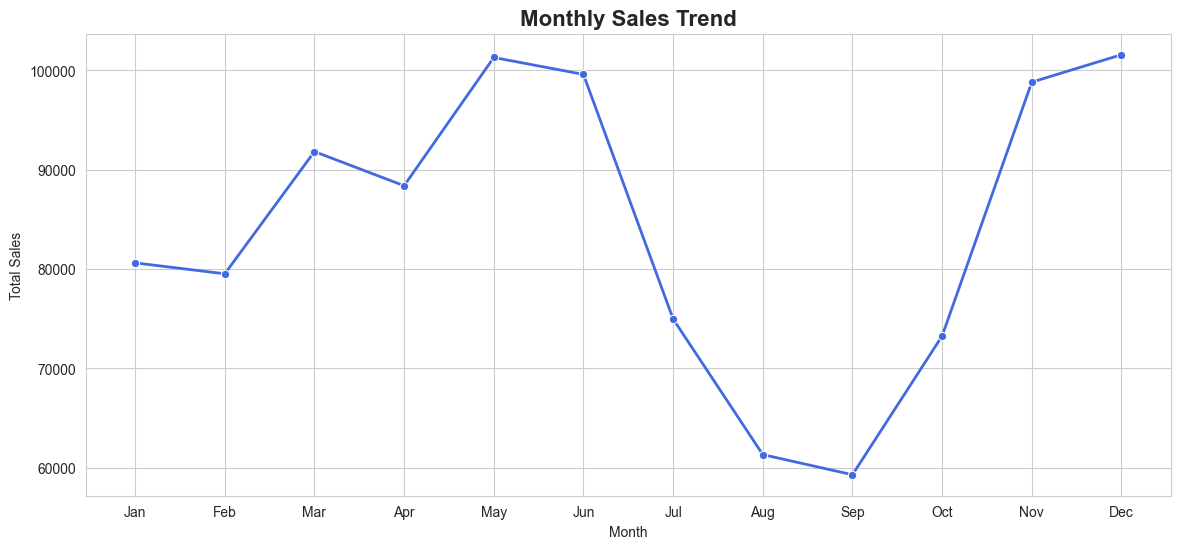

In [27]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='PurchaseAmount', data=sales_by_month, 
             marker='o', linewidth=2, color="royalblue")

# Titles and labels
plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales")


plt.show()

### Remarks:
- sales are increasing from January to May , hitting the annual peak in month may .
- sales are decreasing from May to Sep , reaching to the lowest point in month Sep .
- recovery start in Sep , sales raise again twords the end of the year 
### Inseights :
- Peak in May (Month 5): Strong demand, maybe seasonal campaigns or events.
- Low in September (Month 9): Demand drops sharply.
- Recovery in Nov–Dec: Holiday/end-of-year shopping drives sales.
### Business Decisions from These Insights:
1. **Inventory & Supply Chain** : 
- increase stock before May and again before Nov–Dec to meet high demand.
- Avoid stockouts during peak sales periods.
- Reduce inventory in slow month (Jun , Sep) to lower holding costs.
2. **Marketing & Promotions**:
- Run big campaigns in May and Dec to maximize peak momentum.
- Launch a special offers in Sep to fight the slowdown.
3. **Staffing & Operations** : 
- Schedule extra staff in May and Nov-dec.

### Top Selling Products Categories in peak momentum :

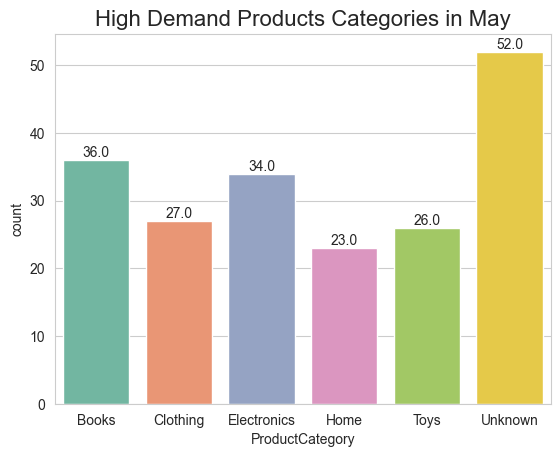

In [ ]:
May_sales = pd.DataFrame(customer_copy[(customer_copy['Month']==5)].groupby('ProductCategory',observed=False).size().round().reset_index(name='count'))
ax = sns.barplot(x='ProductCategory',y='count',data=May_sales,hue='ProductCategory',palette='Set2',legend=False)
plt.title("High Demand Products Categories in May", fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.show()

Books and Electronics categories are the most demanded products categories in May :
- we should increase Books and Electronics stocks and launch new products in these categories before may.

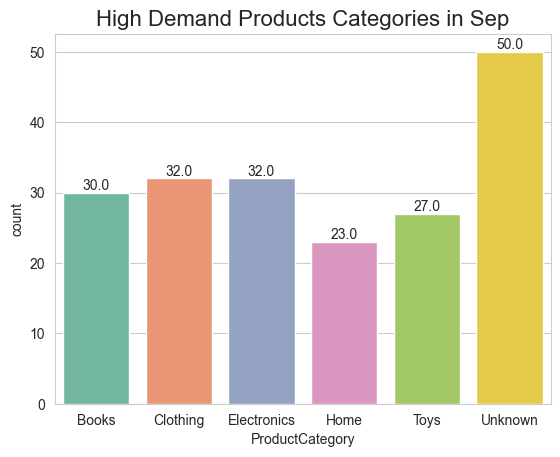

In [ ]:
Sep_sales = pd.DataFrame(customer_copy[(customer_copy['Month']==12)].groupby('ProductCategory',observed=False).size().round().reset_index(name='count'))
ax = sns.barplot(x='ProductCategory',y='count',data=Sep_sales,hue='ProductCategory',palette='Set2',legend=False)
plt.title("High Demand Products Categories in Sep", fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.show()

Clothing , Electronics and Books categories are the most demanded products categories in Sep :
- we should increase Clothing , Books and Electronics stocks and launch new products in these categories before Sep.

### Finding Long tail products :

In [ ]:
sales_by_month_category=pd.DataFrame(customer_copy.groupby(['Month','ProductCategory'],observed=False)['PurchaseAmount'].sum().round(2).reset_index())
category_stats = sales_by_month_category.groupby('ProductCategory',observed=False)['PurchaseAmount'].agg(['mean', 'std']).reset_index()
category_stats['CV'] = category_stats['std'] / category_stats['mean']
category_stats

,ProductCategory,mean,std,CV
0,Books,12452.099167,3053.520308,0.245221
1,Clothing,13259.396667,4014.550710,0.302770
2,Electronics,12896.990833,3755.481738,0.291191
3,Home,11629.050000,3026.951948,0.260292
4,Toys,11806.817500,3995.454926,0.338402
5,Unknown,22170.264167,4820.161254,0.217416


In low-sales periods, we focus on long-tail products with consistent demand (CV < 0.3) :
- Our analysis shows that Books, Electronics, and Home products maintain steady sales throughout the year , we will increase these categories stock.
- we offer a discount on the other un demanded categories such as : Clothing and Toys in low sales periods.

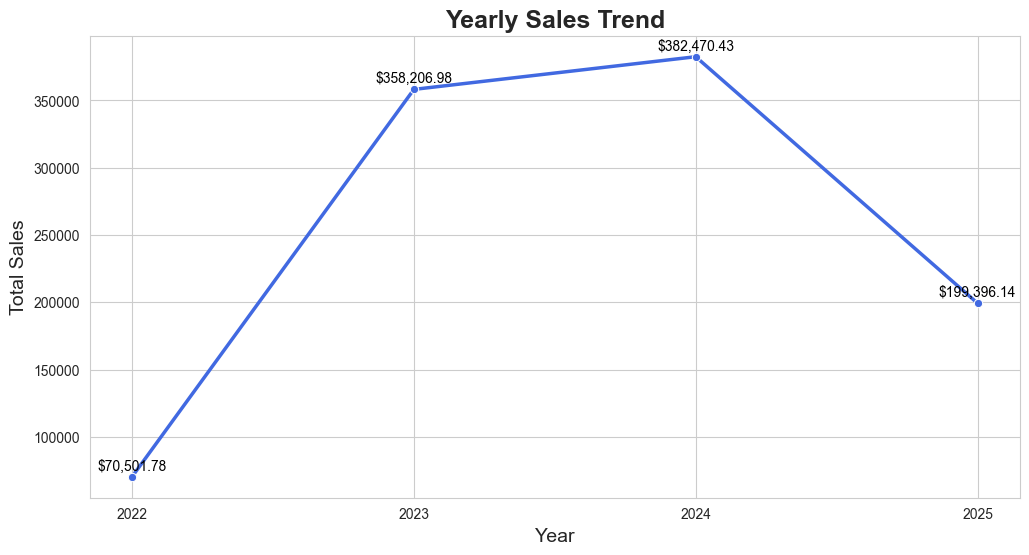

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Ensure Year is integer
customer_copy['Year'] = customer_copy['PurchaseDate'].dt.year.astype(int)

# Group by Year
sales_year = customer_copy.groupby('Year')['PurchaseAmount'].sum().round(2).reset_index()

# Plot
sns.lineplot(x='Year', y='PurchaseAmount', data=sales_year,
             marker='o', linewidth=2.5, color="royalblue")

# Titles and labels
plt.title("Yearly Sales Trend", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)

# Show only unique years
plt.xticks(sales_year['Year'])

# Annotate values on points
for i, row in sales_year.iterrows():
    plt.text(row['Year'], row['PurchaseAmount']+5000, f"${row['PurchaseAmount']:,}", 
             ha='center', fontsize=10, color="black")

plt.show()


### Analysis :

1. **2022** :

- Very low compared to later years.

2. **2023** :

- Huge jump in sales (+400% compared to 2022).

- Indicates business expansion, more customers, or successful campaigns.

- This is a strong growth year.

3. **2024** :

- Sales are still growing, but only slightly (+6.8% vs 2023).

- Business might be reaching maturity, or sales are plateauing.

4. **2025** : (drop)

- Big decline (−48% compared to 2024).

- This is a red flag . Could be due to:

- Market saturation.

- Losing customers to competitors.

- Fewer marketing efforts or weaker product performance.

- External factors (economy, supply chain issues).

### Insights

Overall trend: Growth → Peak → Decline.

Business peaked in 2024, but 2025 shows trouble.

### Business Implications

- we should Investigate what went right in 2023–2024 (campaigns, products, promotions). and we Replicate those strategies.